## Import Necessary Libraries

In [1]:
import re 
import string
import nltk
import pymongo
from pymongo.errors import ConnectionFailure
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

### Connect with mongoDB to fetchDATA from news_data

In [2]:
try:
    client = pymongo.MongoClient("mongodb://localhost:27017")
    database = client["news_data"]
    collection = database["addustourspider"]

    print("Connected to MongoDB successfully!")
    documents = collection.find()

except ConnectionFailure as e:
    print("Could not connect to MongoDB:", e)

except Exception as e:
    print("An error occurred:", e)


Connected to MongoDB successfully!


### Function contain techniques to clean text and Normalisation and Discretization

In [3]:
def CleanNormalize(text):

    #RegEx Patterns
    p_mention = r'\@[\_0-9a-zA-Z]+\:?'
    p_url = r'https?://[A-Za-z0-9./]+'
    p_others = r'[a-zA-Z0-9]+'

    
    if(not isinstance(text, str)):
        return ''
    
    #Cleaning
    text = re.sub(p_mention, 'تنويهحساب', text)  #check mentions
    text = re.sub(p_url, 'وجودرابط', text)   #check URLs
        
    text = re.sub('['+string.punctuation+']', ' ', text)  # Remove punctuation    
    text = re.sub(p_others, '', text)  #remove english chars and numbers
    
    #Normalization
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    
    text = re.sub(r'(.)\1+', r'\1\1', text) #repeated chars
    
    #Removing linebreaks and extra whitespaces
    text = text.replace('\n', ' ').replace('\r', ' ')  
    text = re.sub('\W', ' ', text)
    text = re.sub(' +', ' ', text)
    
    return text.strip()


### Lists to store original and cleaned texts

In [4]:
original_texts = []
cleaned_texts = []

### Loop through documents and clean text

In [5]:
for document in documents:
    original_text = document['content']
    cleaned_text = CleanNormalize(original_text)

    # Adjust the limit in the 3 because will be often happens an error when trying to display large amounts of data after this boucle
    if len(original_texts) < 3:
        original_texts.append(original_text)
        cleaned_texts.append(cleaned_text)
    else:
        break
client.close()

In [6]:
print(cleaned_texts)

['شعرت بخساره مريره لانني لم اكن بين جمهور مباراه كره القدم الجميله التي جمعت قبل ايام الفريقين العريقين الفيصلي والوحدات كم كنت ساكسب لو اني كنت معهم صوتا صادحا واحدا موحدا في هتاف بليغ قوي اغاظ ويغيظ ابناء الماء العكر وصياديه وينحاز الي اردن عظيم باطيافه والوانه كوطن نحبه ونفديه بالمهج ولم يكن يوما الا مع اهله في غزه وفلسطين وسندا لكل جرح عربي الهتافات العظيمه لامست شغاف قلبي ورقصتني بهجه فرغم ان اصوات غرابيه عديده كانت تبث سوداويتها وشءمها مطالبه بالغاء المباراه في الظرف العصيب الذي نمر فيه لانهم يتخوفون من انقلاب المباراه الي معركه دق خشوم و كسر عظم وطحن رءوس لكني لم اكن اخاف ابدا من تلك المواجهه لانني واثق في متانه وقوه مسبحتنا الوطنيه لدي مسبحه مطعمه بالفضه عمرها ثلاثون عاما لها ذكريات طيبه في نفسي لكني لا احبذ ان اظهرها ليس لاني اخشي عليها الانفراط حتي حين ادبك بها لا سمح الله بل لانك قد تقف مع احدهم فيمد يده لا شعوريا وياخذها يتاملها ويداعب شراشيبها ويتفحص حجارتها ويسالك ان كانت حقا فيروزا فتهز راسك مءكدا ثم يكر عليها مرتين ويغافلك ويدسها في جيبه ويمضي في سوق شعبيه كنت اتردد في

In [7]:
stop_words = set(stopwords.words('arabic'))
for cleaned_ in cleaned_texts:
    words = word_tokenize(cleaned_)
    filtered_texts = [word for word in words if not word in stop_words]

# one hot encoding
 For each sample (row) in our corpus, a binary vector is created. The length of this vector is equal to the number of unique categories

In [8]:
One_Hot_Encoding_data = pd.get_dummies(filtered_texts)
print(One_Hot_Encoding_data)

     اتصال  اجندات  اجنداتهم   اخري  ادركتم    ارض  اسودا  اصوات  اضافه  \
0    False   False     False  False   False  False  False  False  False   
1    False   False     False  False   False  False  False  False  False   
2    False   False     False  False   False  False  False  False  False   
3    False   False     False  False   False  False  False  False  False   
4    False   False     False  False   False  False  False  False  False   
..     ...     ...       ...    ...     ...    ...    ...    ...    ...   
363  False   False     False  False   False  False  False  False  False   
364  False   False     False  False   False  False  False  False  False   
365  False   False     False  False   False  False  False  False  False   
366  False   False     False  False   False  False  False  False  False   
367  False   False     False  False   False  False  False  False  False   

     اطفال  ...   يخرج  يدركون   يراه   يسعي  يشبهون   يضره  يطلبون  يعرفون  \
0    False  ...  Fal

### so we have 242 unique word in our corpus

# Bag of words
Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the toal occurences of most frequently used words.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()
result_bow = vectorizer.fit_transform(cleaned_texts)

In [10]:
data_bow_sklearn = pd.DataFrame(result_bow.toarray(), columns=vectorizer.get_feature_names_out())
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  

# Display the DataFrame
print(data_bow_sklearn)


   ابدا  ابعد  ابناء  اتردد  اتصال  اتفاقات  اتفقت  اجندات  اجنداتهم  احبذ  \
0     1     0      1      1      0        0      0       0         0     1   
1     0     1      0      0      0        1      1       0         0     0   
2     0     0      0      0      1        0      0       1         1     0   

   احتياجات  احد  احدا  احدهم  اخاف  اختراق  اخر  اخري  اخشي  اداره  ادبك  \
0         0    0     0      1     1       0    0     0     1      0     1   
1         1    1     1      0     0       1    3     2     0      5     0   
2         0    0     0      0     0       0    0     1     0      0     0   

   ادركتم  اذا  اردن  ارسال  ارض  ارقام  اسال  استخدام  استغلال  اسراءيل  \
0       0    0     1      0    0      0     1        0        0        0   
1       0    1     0      1    0      1     0        1        1        6   
2       1    0     0      0    1      0     0        0        0        0   

   اسمع  اسودا  اصدق  اصوات  اصير  اضافه  اطراف  اطفال  اطلاق  اظهرها  اع

## TF/IDF (Term Frequency Inverse Document Frequency)
**tf–idf** is a numerical statistic that is intended to reflect how important a word is to a document in a **corpus**. 

**tf–idf is** one of the most popular **term-weighting** schemes today.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
result_tfidf = tfidf.fit_transform(cleaned_texts)
tfidf_df = pd.DataFrame(result_tfidf.toarray(), columns = tfidf.get_feature_names_out())
print(tfidf_df)

      ابدا      ابعد    ابناء    اتردد     اتصال   اتفاقات     اتفقت  \
0  0.04561  0.000000  0.04561  0.04561  0.000000  0.000000  0.000000   
1  0.00000  0.027259  0.00000  0.00000  0.000000  0.027259  0.027259   
2  0.00000  0.000000  0.00000  0.00000  0.035666  0.000000  0.000000   

     اجندات  اجنداتهم     احبذ  احتياجات       احد      احدا    احدهم  \
0  0.000000  0.000000  0.04561  0.000000  0.000000  0.000000  0.04561   
1  0.000000  0.000000  0.00000  0.027259  0.027259  0.027259  0.00000   
2  0.035666  0.035666  0.00000  0.000000  0.000000  0.000000  0.00000   

      اخاف    اختراق       اخر      اخري     اخشي     اداره     ادبك  \
0  0.04561  0.000000  0.000000  0.000000  0.04561  0.000000  0.04561   
1  0.00000  0.027259  0.081777  0.041462  0.00000  0.136295  0.00000   
2  0.00000  0.000000  0.000000  0.027125  0.00000  0.000000  0.00000   

     ادركتم       اذا     اردن     ارسال       ارض     ارقام     اسال  \
0  0.000000  0.000000  0.04561  0.000000  0.000000  0.00

<div style="background-color: #3498db; color: white; text-align: center; padding: 10px;">
    <h1>Word Embedding</h1>
</div>
Word2Vec creates vectors of the words that are distributed numerical representations of word features – these word features could comprise of words that represent the context of the individual words present in our vocabulary. Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors.

Two different model architectures that can be used by Word2Vec to create the word embeddings are the Continuous Bag of Words (CBOW) model & the Skip-Gram model.

In [12]:
import gensim
file_path = '/home/hafdaoui/Downloads/CBOW_500_3_400/w2v_CBOW_500_3_400_10.model'
word_embed = gensim.models.Word2Vec.load(file_path)
embeddings = [word_embed.wv[word] for word in filtered_texts if word in word_embed.wv]

In [13]:
# Find the most similar words for each word in filtered_texts
most_similar_words = {}
for word in filtered_texts:
    if word in word_embed.wv:
        most_similar_words[word] = word_embed.wv.most_similar(word)

# Print the most similar words for each word in filtered_texts
for word, similar_words in most_similar_words.items():
    print(f"Most similar words to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"- {similar_word}: {similarity}")

Most similar words to 'رساءل':
- رساله: 0.6704689860343933
- رسايل: 0.5918739438056946
- الرساءل: 0.5559888482093811
- خطابات: 0.43826282024383545
- عبارات: 0.43123573064804077
- مكالمات: 0.42268142104148865
- اشعارات: 0.4139350950717926
- الرساله: 0.41255706548690796
- برساله: 0.4098140001296997
- نصيه: 0.4082615077495575
Most similar words to 'تاييد':
- ادانه: 0.43443721532821655
- قمع: 0.4258815050125122
- اتهام: 0.40632709860801697
- سياسي: 0.38520562648773193
- تحالف: 0.3729611039161682
- انتقاد: 0.37253525853157043
- تعاطف: 0.36813899874687195
- دعم: 0.35770171880722046
- تحريض: 0.356758713722229
- يءيد: 0.3499196171760559
Most similar words to 'بحجم':
- حجم: 0.429953008890152
- وحجم: 0.3421171009540558
- بقدر: 0.34082967042922974
- شكرا: 0.31791460514068604
- يسع: 0.29865220189094543
- بسعه: 0.28255850076675415
- بمقدار: 0.28205636143684387
- يفوق: 0.2800024449825287
- تعانق: 0.27990424633026123
- يوازي: 0.2795914113521576
Most similar words to 'حب':
- عشق: 0.5967699885368347
- 

In [14]:
cbow_model_path = '/home/hafdaoui/Downloads/CBOW_500_3_400/w2v_CBOW_500_3_400_10.model'
cbow_model = gensim.models.Word2Vec.load(cbow_model_path)

# Load Skip-gram model
skipgram_model_path = '/home/hafdaoui/Downloads/SG_500_3_400/w2v_SG_500_3_400_10.model'
skipgram_model = gensim.models.Word2Vec.load(skipgram_model_path)


# CBOW embeddings
cbow_embeddings = [cbow_model.wv[word] for word in filtered_texts if word in cbow_model.wv]
cbow_most_similar_words = {}
for word in filtered_texts:
    if word in cbow_model.wv:
        cbow_most_similar_words[word] = cbow_model.wv.most_similar(word)

# Skip-gram embeddings
skipgram_embeddings = [skipgram_model.wv[word] for word in filtered_texts if word in skipgram_model.wv]
skipgram_most_similar_words = {}
for word in filtered_texts:
    if word in skipgram_model.wv:
        skipgram_most_similar_words[word] = skipgram_model.wv.most_similar(word)

In [15]:
print("CBOW Model".ljust(40), "Skip-gram Model")
print("=" * 80)
for word in filtered_texts:
    cbow_similar_words = cbow_most_similar_words.get(word, [])
    skipgram_similar_words = skipgram_most_similar_words.get(word, [])
    max_len = max(len(cbow_similar_words), len(skipgram_similar_words))
    for i in range(max_len):
        cbow_word, cbow_similarity = cbow_similar_words[i] if i < len(cbow_similar_words) else ("", "")
        skipgram_word, skipgram_similarity = skipgram_similar_words[i] if i < len(skipgram_similar_words) else ("", "")
        print(f"{word}: {cbow_word} ({cbow_similarity})".ljust(40), f"{skipgram_word} ({skipgram_similarity})")
        print("-----------------------------------------------------------------------------")

CBOW Model                               Skip-gram Model
رساءل: رساله (0.6704689860343933)        رساله (0.6059836149215698)
-----------------------------------------------------------------------------
رساءل: رسايل (0.5918739438056946)        رسايل (0.5116742849349976)
-----------------------------------------------------------------------------
رساءل: الرساءل (0.5559888482093811)      الرساءل (0.5116012692451477)
-----------------------------------------------------------------------------
رساءل: خطابات (0.43826282024383545)      نصيه (0.4924173653125763)
-----------------------------------------------------------------------------
رساءل: عبارات (0.43123573064804077)      عناوين (0.3804311454296112)
-----------------------------------------------------------------------------
رساءل: مكالمات (0.42268142104148865)     الرساله (0.37862685322761536)
-----------------------------------------------------------------------------
رساءل: اشعارات (0.4139350950717926)      النصيه (0.37552630901

### Word2Vec is a neural network-based algorithm that learns word embeddings, which are numerical representations of words that capture their semantic and syntactic relationships.

# FASTTEXT

In [16]:
import numpy as np
import fasttext
import gensim
from gensim.models import FastText
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

model_path = '/home/hafdaoui/Downloads/cc.ar.300.bin'  #https://fasttext.cc/docs/en/crawl-vectors.html
fasttext_model = fasttext.load_model(model_path)

In [17]:
embeddings = []
for text in filtered_texts:
    text_embeddings = []
    for word in text:
        if word in fasttext_model:
            word_embedding = fasttext_model[word]
            text_embeddings.append(word_embedding)
    if text_embeddings:
        text_embedding = np.mean(text_embeddings, axis=0)
        embeddings.append(text_embedding)
    else:
        embeddings.append(np.zeros(fasttext_model.get_dimension()))

embeddings = np.array(embeddings)

In [18]:
embeddings

array([[ 0.01388851, -0.05865883,  0.1674848 , ...,  0.15048763,
         0.11321753, -0.09131858],
       [-0.06616455, -0.09171498,  0.12396055, ...,  0.13173887,
         0.19837765, -0.07601576],
       [-0.00522108, -0.07914393,  0.18516645, ...,  0.07836755,
         0.14693165, -0.01771181],
       ...,
       [-0.05553827, -0.04046194,  0.10429362, ...,  0.10233903,
         0.08824357, -0.09890858],
       [-0.05833003, -0.03258638,  0.1107601 , ...,  0.11608865,
         0.12110458, -0.03073472],
       [-0.00236098,  0.0015545 ,  0.10620095, ...,  0.10257526,
         0.150805  , -0.06656588]], dtype=float32)

# Glove

In [19]:
import numpy as np
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_texts)
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # 
    embedding_matrix_vocab = np.zeros((vocab_size, embedding_dim))
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix_vocab

embedding_dim = 50
#https://www.kaggle.com/datasets/watts2/glove6b50dtxt?resource=download
glove_filepath = '/home/hafdaoui/Downloads/archive/glove.6B.50d.txt' 
embedding_matrix_vocab = embedding_for_vocab(glove_filepath, tokenizer.word_index, embedding_dim)

print("Dense vector for first word is => ", embedding_matrix_vocab[1])


2024-05-04 01:03:58.124296: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-04 01:03:58.166463: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-04 01:03:58.322299: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 01:03:58.322349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 01:03:58.355163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Dense vector for first word is =>  [-5.45220017e-01  8.93899977e-01 -4.47489992e-02 -1.72780007e-01
 -1.73590004e-01 -9.78619993e-01  1.16700006e+00 -3.97520006e-01
  1.50969997e-02  6.65549994e-01  2.12779999e-01  4.19400007e-01
  1.23699999e+00  5.07359982e-01  1.65439997e-04 -3.15800011e-01
  1.25120003e-02  7.43260026e-01  1.78959996e-01  1.20109999e+00
 -7.34709978e-01 -3.53049994e-01  6.37910008e-01  1.43280005e+00
  4.98450011e-01  7.86069989e-01 -4.67990011e-01 -1.36429995e-01
  1.30860001e-01 -2.69360006e-01 -2.89039999e-01 -1.61579996e-01
 -1.82390004e-01  1.27279997e+00 -2.88399998e-02  1.83860004e-01
  6.86160028e-02 -7.24860013e-01 -3.88550013e-01  3.15379985e-02
  1.10630000e+00 -4.64969993e-01  5.92270017e-01  3.12279999e-01
 -1.15249999e-01  3.49550009e-01  1.15380001e+00  1.01820004e+00
  2.90439993e-01  1.77010000e-01]


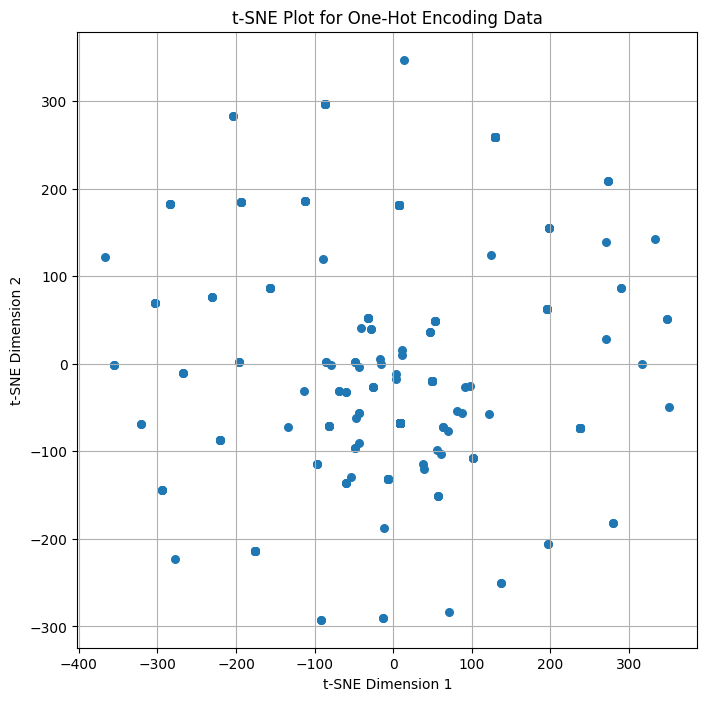

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_tsne(embeddings, labels=None, title="t-SNE Plot"):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_tsne = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8, 8))
    if labels is None:
        plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], marker='o', s=30)
    else:
        unique_labels = np.unique(labels)
        for label in unique_labels:
            indices = np.where(labels == label)
            plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], label=label, s=30)
        plt.legend()

    plt.title(title)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.grid(True)

    filename = title
    plt.savefig(f"{filename}.png")
    plt.show()

plot_tsne(One_Hot_Encoding_data.values, title="t-SNE Plot for One-Hot Encoding Data")


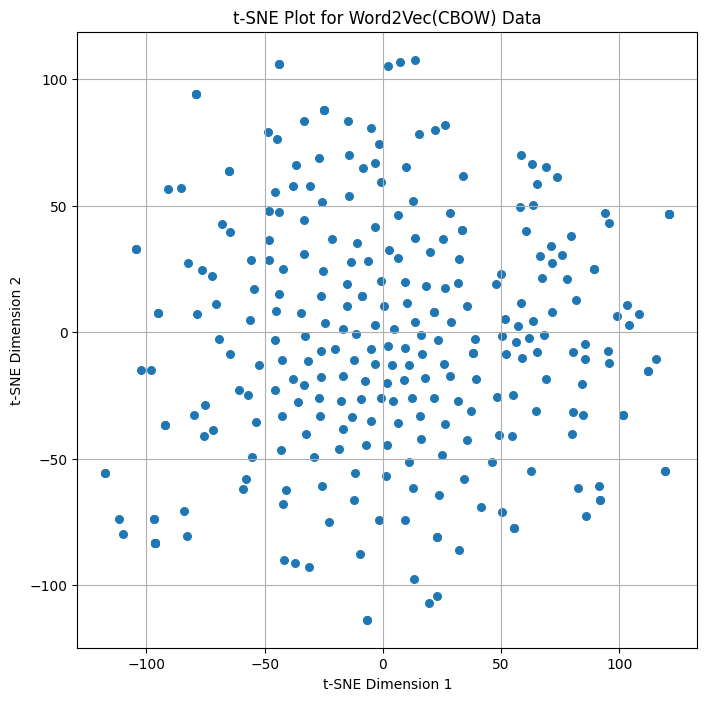

In [21]:
plot_tsne(np.array(cbow_embeddings), title="t-SNE Plot for Word2Vec(CBOW) Data")


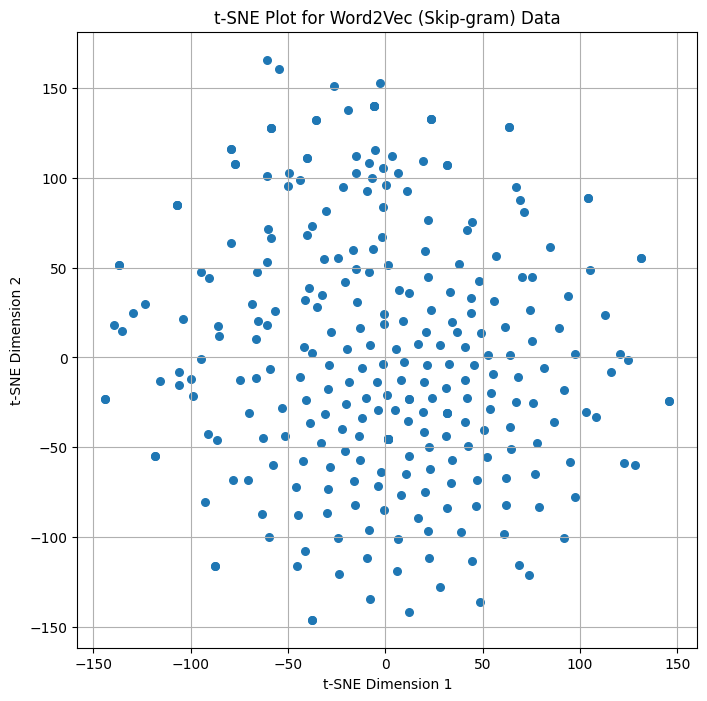

In [22]:
plot_tsne(np.array(skipgram_embeddings), title="t-SNE Plot for Word2Vec (Skip-gram) Data")

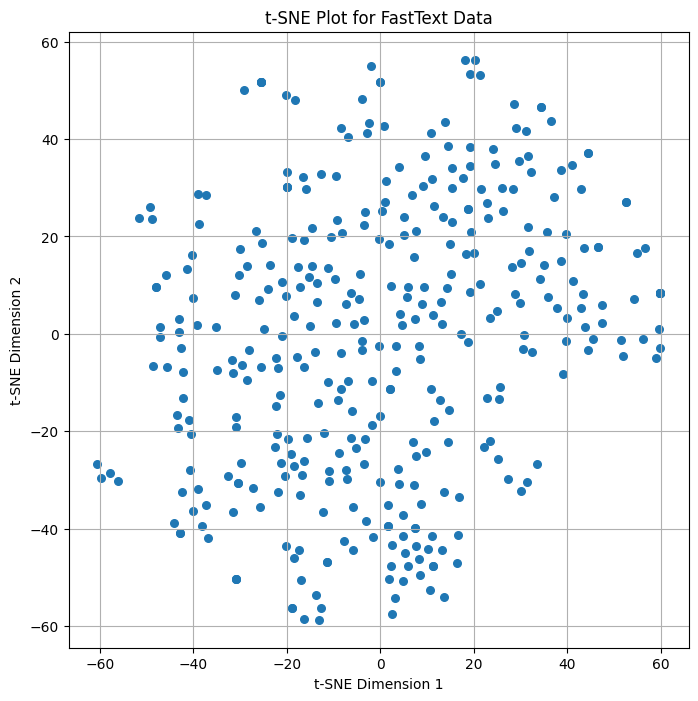

In [23]:
plot_tsne(embeddings, title="t-SNE Plot for FastText Data")

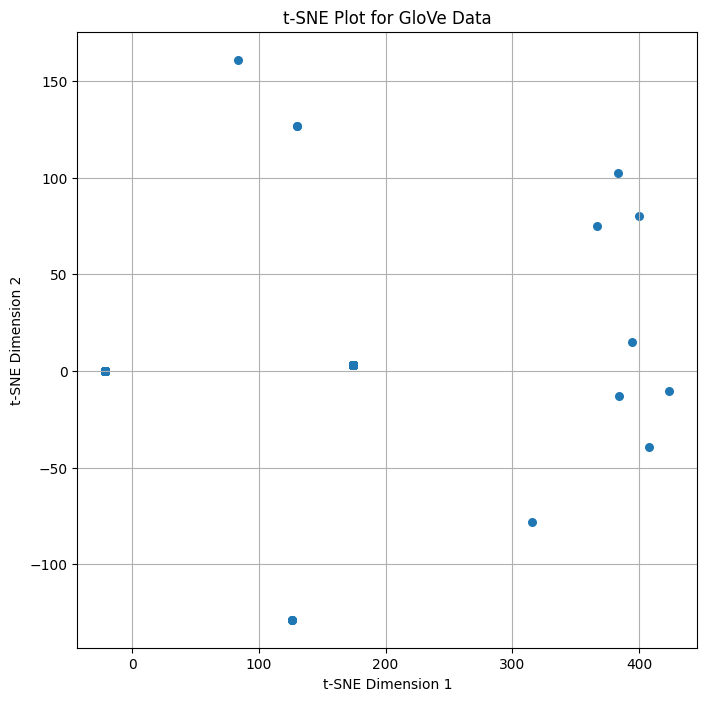

In [24]:
plot_tsne(embedding_matrix_vocab, title="t-SNE Plot for GloVe Data")

#### The choice of the optimal text vectorization technique depends heavily on the specific task and the nature of the dataset.

#### For tasks requiring understanding of semantic relationships and context, Word2Vec and FastText appear to be better choices compared to simpler methods like one-hot encoding and Bag-of-Words.

#### Dimensionality reduction techniques like t-SNE are helpful for visualizing and understanding the relationships captured by different text vectorization methods.